# Clustering Mall Customers - *what is the best way to split up our shoppers into groups?*

Last updated: September 2020

## How is this useful?

Splitting up the mall shoppers into distinct groups is a very useful task that can inform many future decisions. For example, we can identify how many different shopper groups we have and assign them a specific name. We can then decide what kind of offers we are going make to each group based on the shopping behaviour of that group. Additionally, when a new shoppper starts shopping at our mall, we can add them to a group and re-adjust our groupings slightly based on if this person behaves how we expect. Lastly, we could use the groupings as features for some downstream classification or regression model.


## About the Dataset

This dataset contains information about many shoppers at a mall. We have 200 observations of 5 features. The features are:

* Customer ID
* Gender
* Age
* Annual Income
* Spending Score

It is worth noting that this dataset is not real, and as such contains no missing values and no imperfections. Therefore, there is very little work required to get this data in shape for analysis - *I am using this mostly as refresher for k-means clustering and for making nice plots.*

The data is open source and can be downloaded here https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python


## Exploring the Data

The first thing we should do is read in the data, print the shape and first few lines to get an idea of what we are working with. We can see that we have 200 observations of 5 features. The first one is the customer ID, which is just a unique number that identifies each customer. We also have gender, age, annnual income and spending score. The customer ID is not useful to us so we will not consider it. Since we want to cluster these data points, we require continuous values, so we will not use gender. That leaves age, annual income and spending score.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

# read in the dataset, print shape and column titles
dataset = pd.read_csv('Mall_Customers.csv')
print("Dataset shape: ", dataset.shape)
print(dataset.head())

Dataset shape:  (200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Let's create a histogram of age and annual income to see how the data is distributed. We oberserve that our customers range from around 19 to 70 years old and that the distribution is right skewed - we have a higher count of young than older people.

<IPython.core.display.Javascript object>


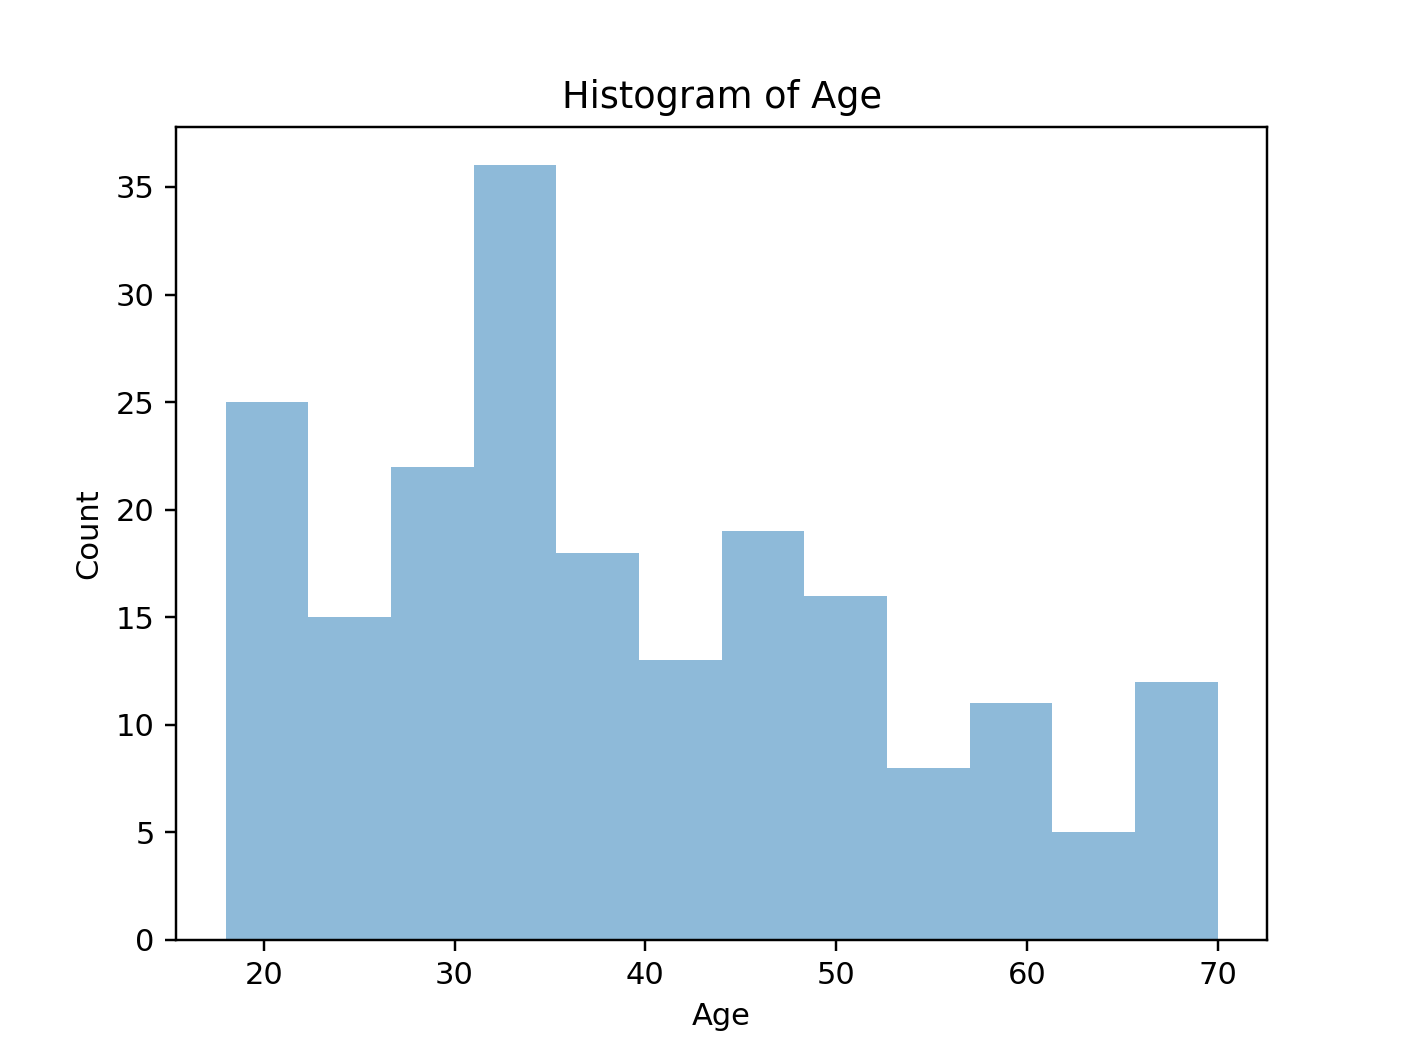

In [2]:
%matplotlib notebook
x = dataset.iloc[:,2].values

plt.figure(dpi=110)
plt.hist(x,12,alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')
plt.show()

For income we see that the distribution is more central with a large proportion of customers earning roughly in between the two extremes of 20 and 140 thousand dollars.

<IPython.core.display.Javascript object>


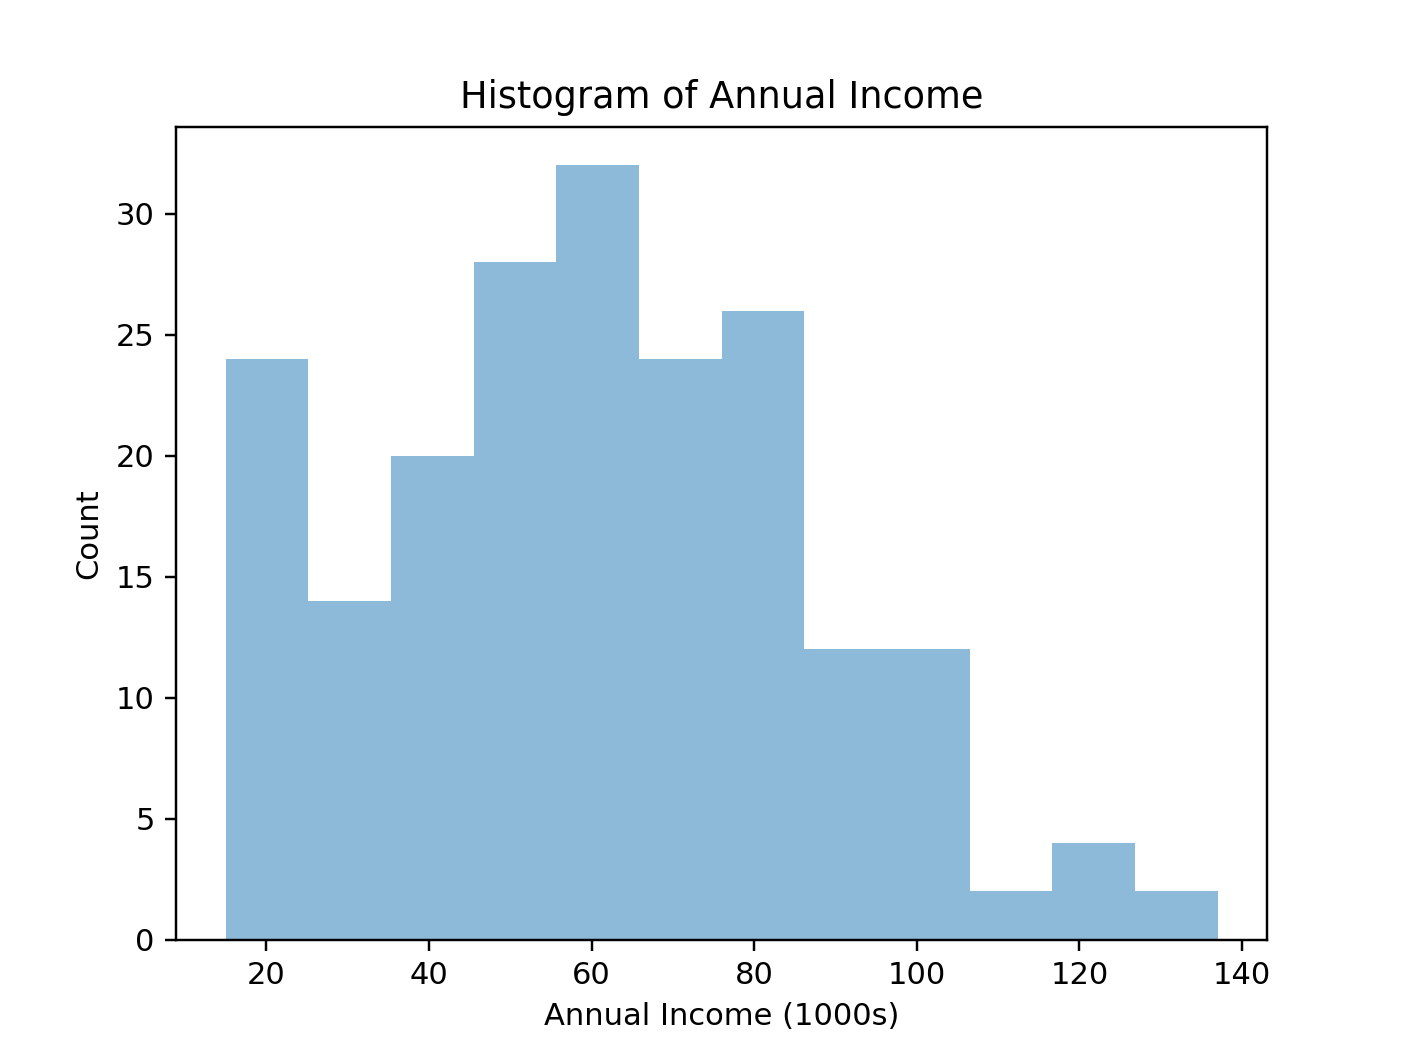

In [3]:
x = dataset.iloc[:,3].values

plt.figure(dpi=110)
plt.hist(x,12,alpha=0.5)
plt.xlabel('Annual Income (1000s)')
plt.ylabel('Count')
plt.title('Histogram of Annual Income')
plt.show()

Spending score is quite an important variable to us since it describes how much the customer makes purchases at the mall. We can create a scatter plot of spending score vs age and spending score vs annual income to visualise the relationships.

What we see in both cases is that there is no real correlation at all between spending score and age or spending score and annual income. What we do see, though, is some clear clusters of data, especially in spending score vs annual income. This shows us that k-means clustering will likely produce some nice well defined clusters in our data.

<IPython.core.display.Javascript object>


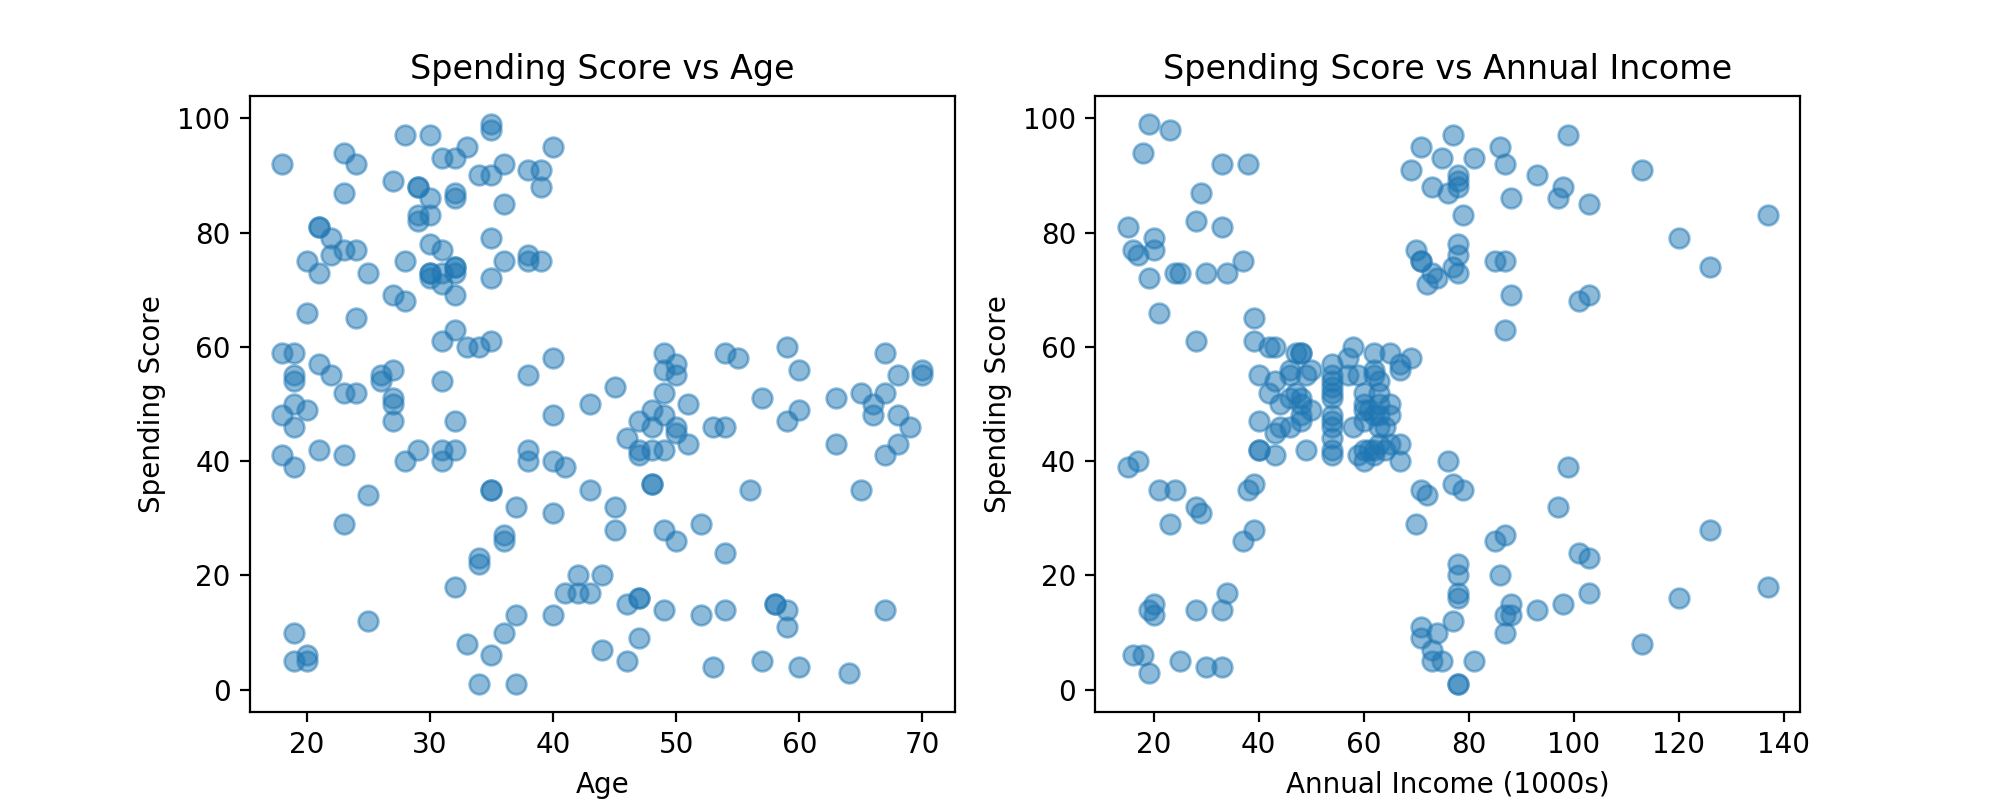

In [11]:
X = dataset.iloc[:,[2,4]].values
Y = dataset.iloc[:,[3,4]].values

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))
ax1.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis', alpha=0.5)
ax1.set_title('Spending Score vs Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Spending Score')

ax2.scatter(Y[:, 0], Y[:, 1], s=50, cmap='viridis', alpha=0.5)
ax2.set_title('Spending Score vs Annual Income')
ax2.set_xlabel('Annual Income (1000s)')
ax2.set_ylabel('Spending Score')
plt.show()

## K-Means Clustering

### 1) Spending Score vs Age

K-means clustering, in the most basic implementation, has 2 issues. First, how do we choose the optimal number of clusters? Second, how do we choose the best initialisation locations for the centroids? We can use some techniques to easily solve both of these problems. Firstly, we choose the optimal number of clusters using the "elbow method" of minimising the Within Clusters Sum of Squares (WCSS) error. In this method we fit the k-means algorithm for 10 different values of k and measure the WCSS for each k. We then plot a graph of WCSS vs k and look for the "elbow point" which is a sharp change in gradient where the curve suddenly flattens out.

Below we can see this curve plotted for spending score and age. We see that the elbow point occurs when k=4 showing that the optimal number of clusters to use is 4.

For the second issue, we can use the "k-means++" initialiser to try many different combinations of centroid initialisations and select the best one for us.

<IPython.core.display.Javascript object>


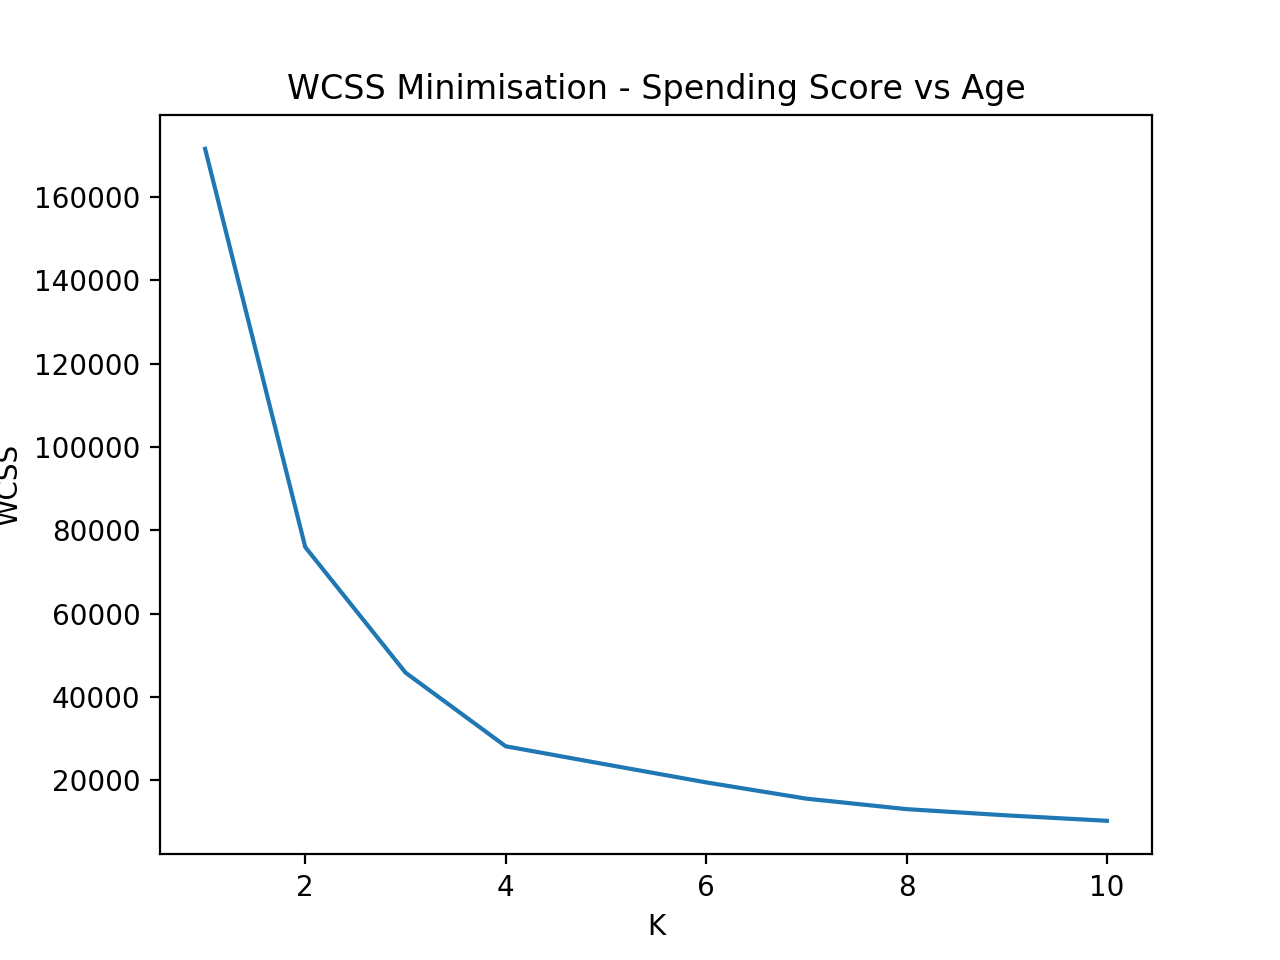

In [12]:
X = dataset.iloc[:,[2,4]].values

# calculate optimal number of clusters
from sklearn.cluster import KMeans
wcss = []   # create empty list to hold WCSS values for each K-Means fit

# loop through 10 values of K to find the optimal value, calculate WCSS on each pass
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10,
                    random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # kmeans.inertia_ is the WCSS calculation
    
# visualise the plot of WCSS - optimal K is found to be 5
plt.figure() 
plt.plot(range(1,11), wcss)
plt.title('WCSS Minimisation - Spending Score vs Age')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

Now that we know the ideal number of clusters is 4, we can fit the k-means algorithm to our data. We see that by selecting 4 clusters, we have some nicely separated groups of points and even though the spending score vs age scatter plot originally looked very messy, we can now see some clear groups appearing.

We can already start to make some decisions as to how these 4 groups behave and start engineering some tailored offers based on this grouping. For example, we can see that the group with the highest average spending score is very young. Being young, perhaps these shoppers enjoy being up to date on the latest technology/fashion items and are more likely to interested in new items being released. We could use this information to bombard these shoppers with advertisements for the latest and newest products.

<IPython.core.display.Javascript object>


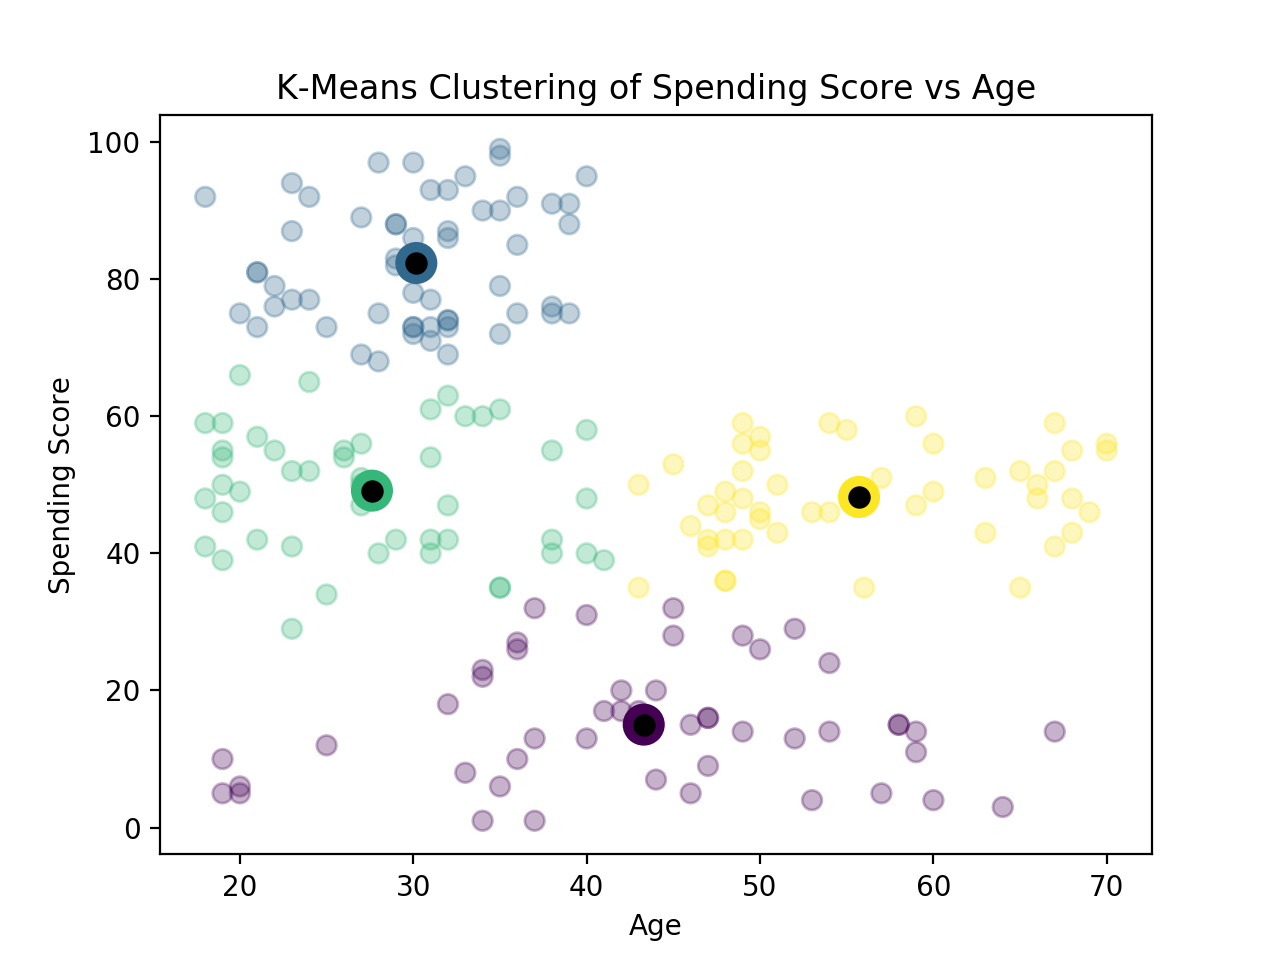

In [13]:
# apply k means to mall dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10,
                    random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.3)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c=np.arange(4), cmap='viridis', s=200, alpha=1.0)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=1.0)
plt.title('K-Means Clustering of Spending Score vs Age')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

### 2) Spending Score vs Annual Income

Now we move onto spending score vs annual income. From looking at the scatter plot above, we can already see that it may be easier to cluster this data compared with spending score vs age. This makes sense because the amount of money you earn is directly tied to your purchasing behaviour.

Again we perform the WCSS minimisation, finding this time that 5 is the optimal number of clusters.

<IPython.core.display.Javascript object>


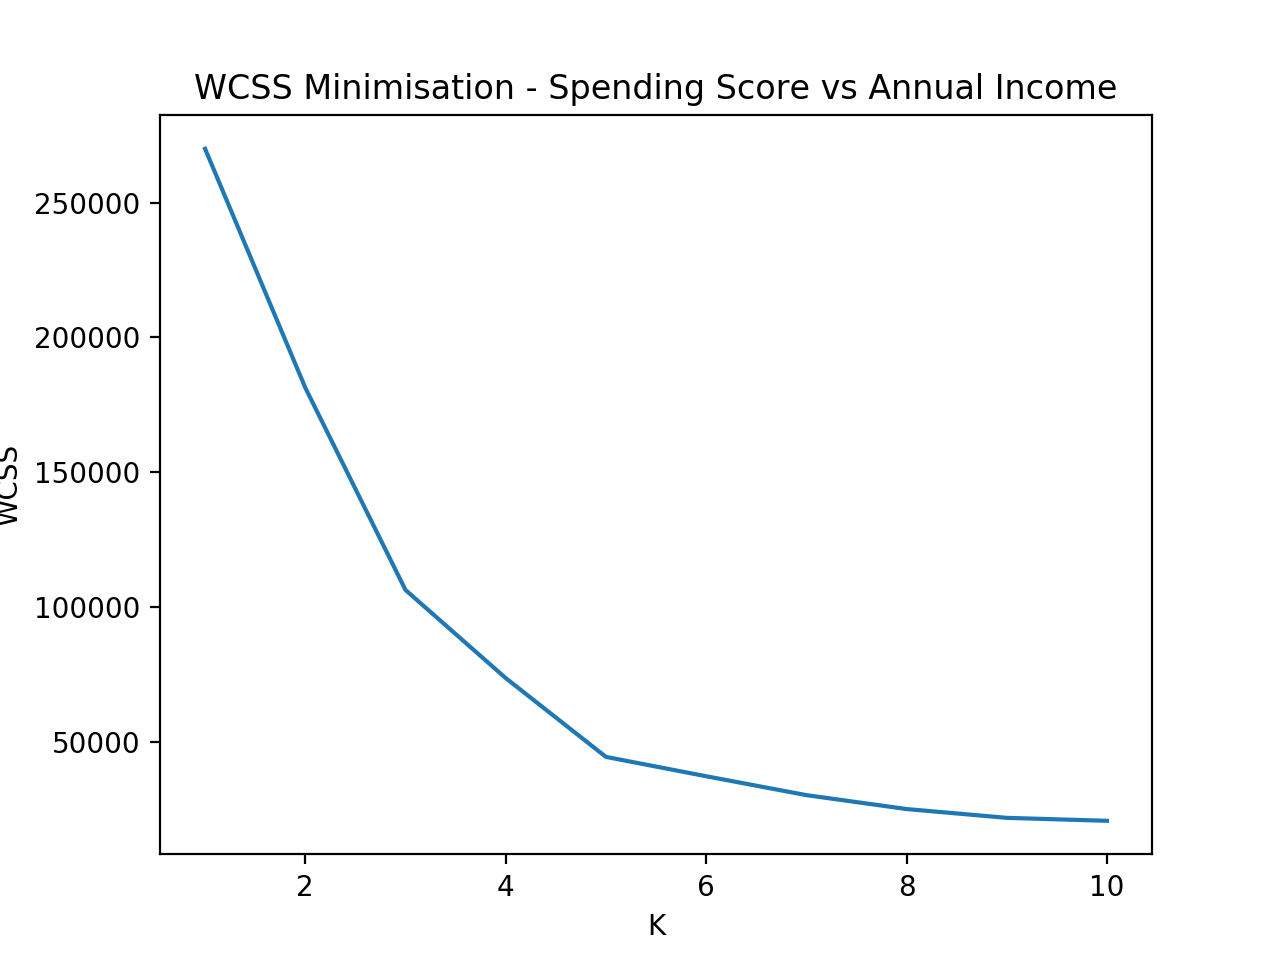

In [14]:
X = dataset.iloc[:,[3,4]].values

# calculate optimal number of clusters
from sklearn.cluster import KMeans
wcss = []   # create empty list to hold WCSS values for each K-Means fit

# loop through 10 values of K to find the optimal value, calculate WCSS on each pass
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10,
                    random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # kmeans.inertia_ is the WCSS calculation
    
# visualise the plot of WCSS - optimal K is found to be 5
plt.figure() 
plt.plot(range(1,11), wcss)
plt.title('WCSS Minimisation - Spending Score vs Annual Income')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

As last time, we perform k-means clustering on the data. Here we see much more distinct clusters that are better separated. As we would expect, there is a cluster with both high spending score and income. It makes sense that individuals with high income have a lot of spare cash and so can spend lots at the mall. However, a much more interesting insight is that there is another group with an equally high spending score, but at the other end of the income spectrum. It appears that even with low insome, this group still purchases many products. This insight may drive some additional research into what type of products these low income, high purchasing customers are buying. In this way we can target both high spending groups with different advertisement materials for different products.

Another interesting group is the high income, low spending score group. Instead of squandering their riches, these individuals opt to hold onto their cash. These types of buyers may only be interested in seeing deals and discounts and so should be the first to be notified.

<IPython.core.display.Javascript object>


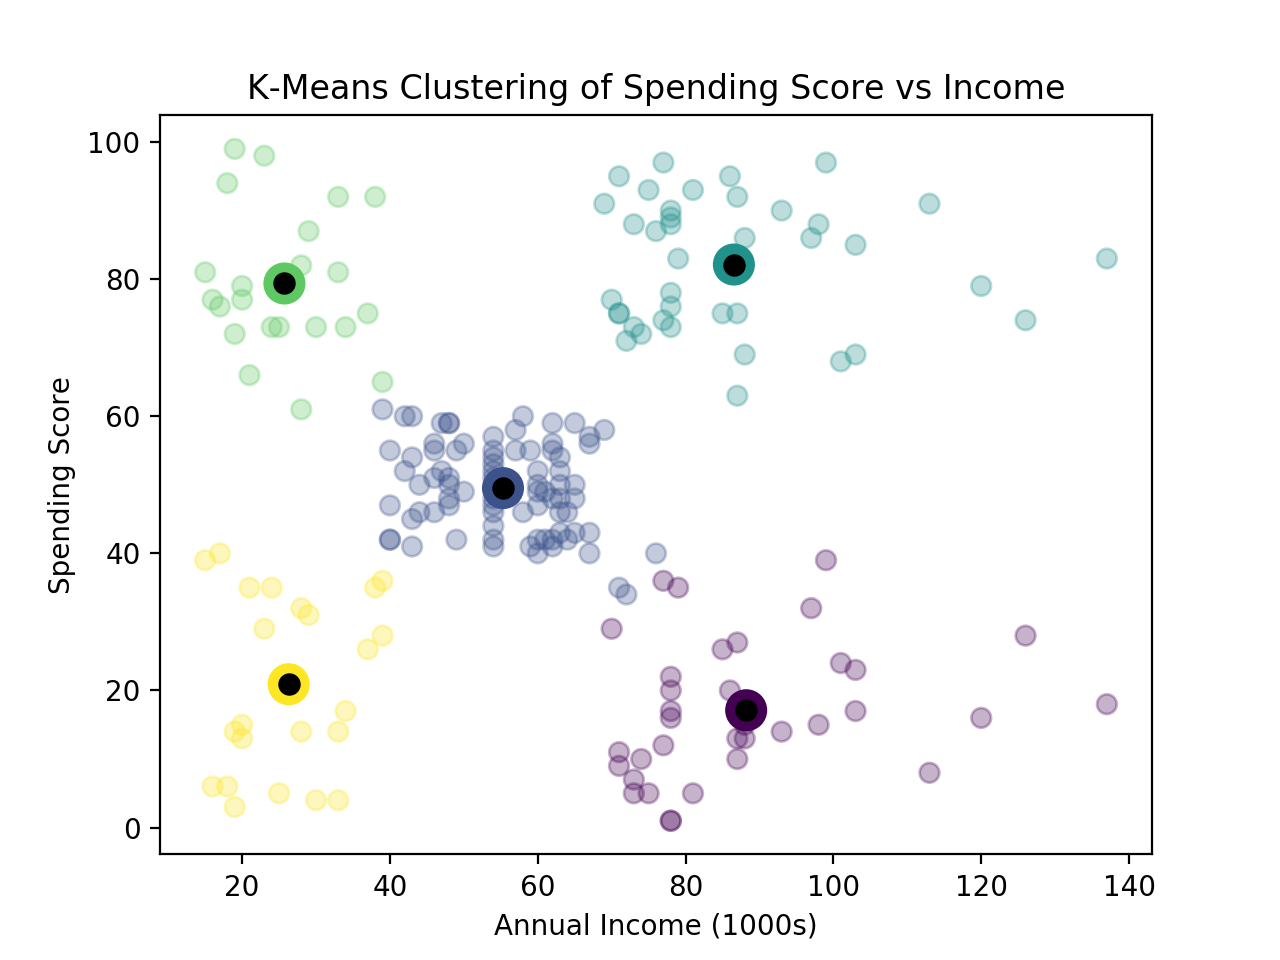

In [15]:
# apply k means to mall dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10,
                    random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.3)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c=np.arange(5), cmap='viridis', s=200, alpha=1.0)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=1.0)
plt.title('K-Means Clustering of Spending Score vs Income')
plt.xlabel('Annual Income (1000s)')
plt.ylabel('Spending Score')
plt.show()

### 3) All Variables

What about including all variables? Is it easier to find groups in our data if we use spending score vs annual income and age? We can find out by doing the same analysis and creating a 3 dimensional plot of the resulting clusters.

From the WCSS curve, this time it is actually very difficult to decide what is the optimal number of clusters since there is no sudden change in gradient. We will go with 5, but this does not look good in terms of how easy it is to form clusters using all variables.

<IPython.core.display.Javascript object>


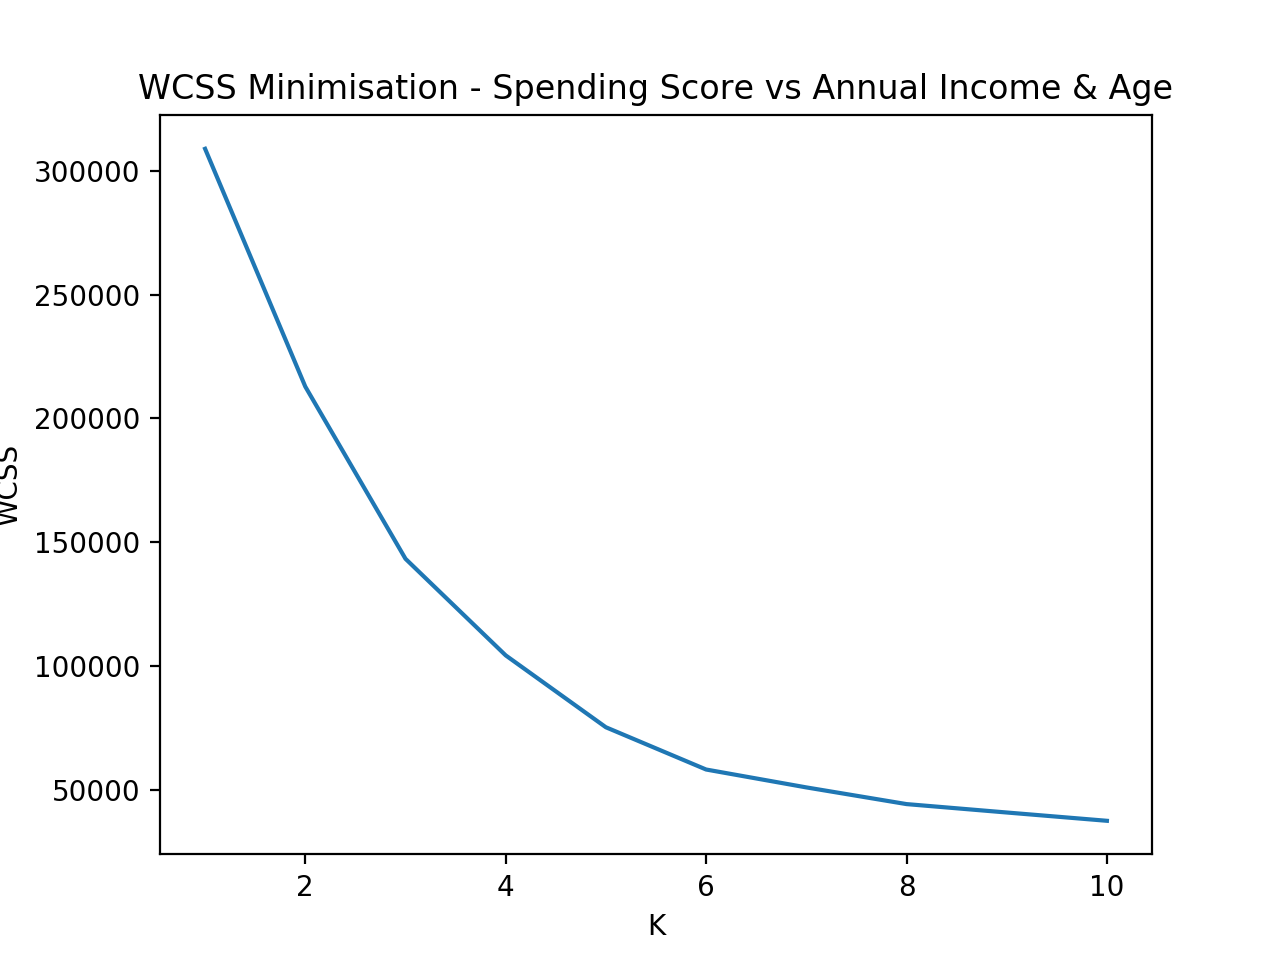

In [16]:
X = dataset.iloc[:,[2,3,4]].values

# calculate optimal number of clusters
from sklearn.cluster import KMeans
wcss = []   # create empty list to hold WCSS values for each K-Means fit

# loop through 10 values of K to find the optimal value, calculate WCSS on each pass
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10,
                    random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # kmeans.inertia_ is the WCSS calculation
    
# visualise the plot of WCSS - optimal K is found to be 5
plt.figure() 
plt.plot(range(1,11), wcss)
plt.title('WCSS Minimisation - Spending Score vs Annual Income & Age')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

We create the k-means plot as before. We can see from the plot that in this 3D space there are not many tightly packed clusters. The only 2 tightly packed clusters are the purple and yellow clusters. We can see that the purple cluster has high spending score, mid-high income and low age. These may be young professionals with lucrative careers who are willing to spend a lot of money. The yellow cluster also has high spending score, but low income and low age. It may be interesting to look into what types of products these customers are buying and what makes them different from the other high spending group. Other than these two groups, the other clusters are not tightly packed in 3 dimensions and so add little value to the separation of the groups.

<IPython.core.display.Javascript object>


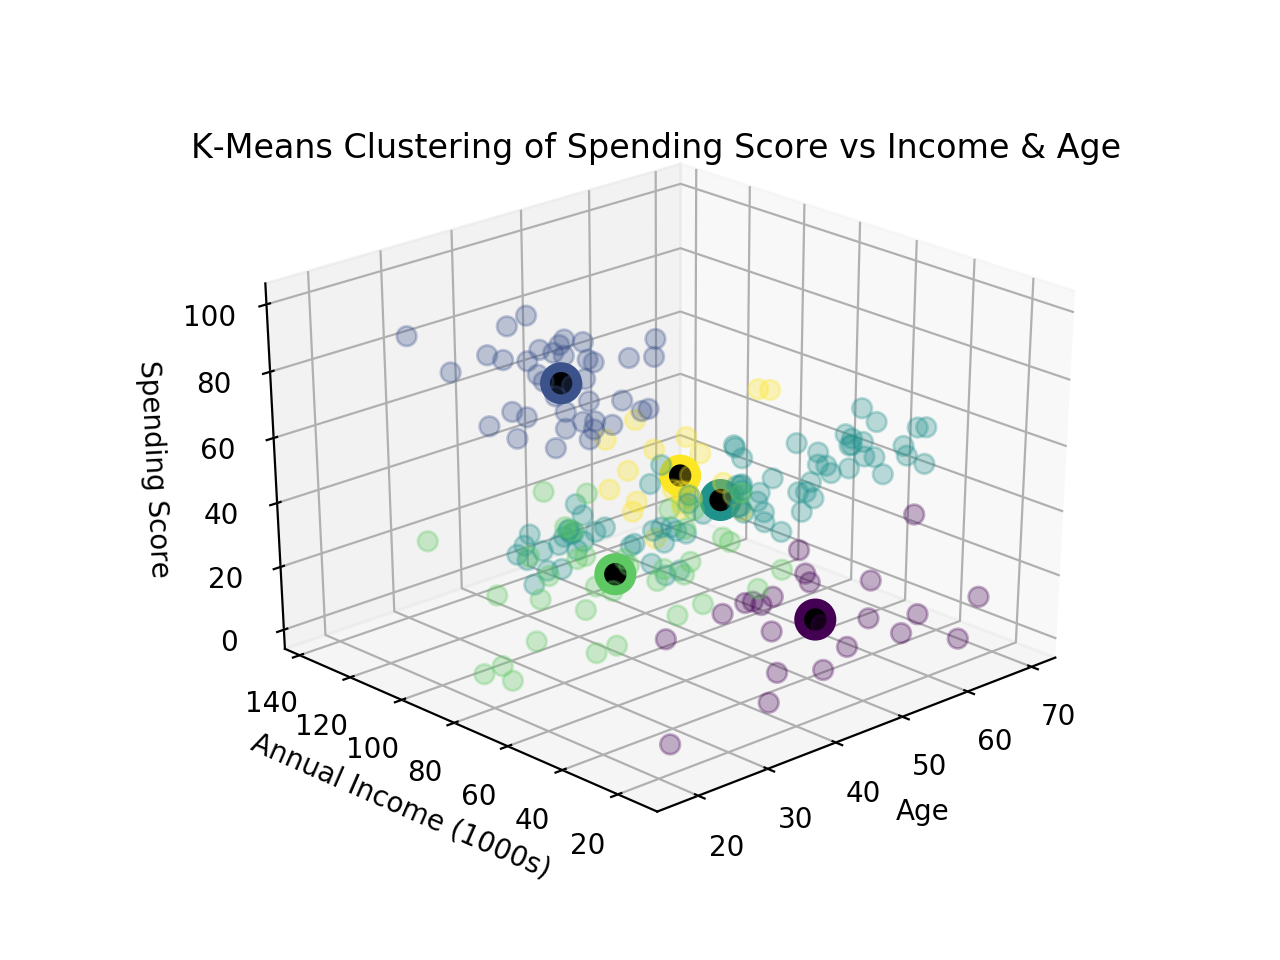

In [10]:
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# apply k means to mall dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10,
                    random_state=0)
y_kmeans = kmeans.fit_predict(X)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_kmeans, s=50, cmap='viridis', alpha=0.3)

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c=np.arange(5), cmap='viridis', s=200, alpha=1.0)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=50, alpha=1.0)
ax.set_title('K-Means Clustering of Spending Score vs Income & Age')
ax.set_ylabel('Annual Income (1000s)')
ax.set_xlabel('Age')
ax.set_zlabel('Spending Score')
plt.show()

## Conclusion

We are concerned with the most useful way to split up these customers into distinct groups based on their purchasing behaviour. With this objective in mind, it seems that clustering our customers based on spending score and annual income gives us the clearest separation between groups and therefore the easiest way to start tailoring our strategy towards each group. When we tried spending score and age we saw more overlap between different groups, making it more difficult to classify our customers and any future customers. Lastly, when using all three variables some clusters were very clear, but the marjority were not with a lot of overlap between the other clusters. Therefore, clustering our customers by annual income and spending score seems to be the most sensible outcome.